# Logistic regression on unbalanced data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
dt = pd.read_csv("fraud.csv")

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for column in categorical_columns:
    dt[column] = label_encoder.fit_transform(dt[column].astype(str))

In [ ]:
X = dt.drop("isFraud", axis=1)
y = dt["isFraud"]

In [ ]:
# Handling NaN values
if y.isna().sum() > 0:
    dt = dt.dropna(subset=['isFraud'])
    X = dt.drop("isFraud", axis=1)
    y = dt["isFraud"]

In [ ]:
print("Dataset Shape:", dt.shape)
dt.info()
print(dt.describe())

Dataset Shape: (6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
               step          type        amount      nameOrig  oldbalanceOrg  \
count  6.362620e+06  6.362620e+06  6.362620e+06  6.362620e+06   6.362620e+06   
mean   2.433972e+02  1.714150e+00  1.798619e+05  3.176678e+06   8.338831e+05   
std    1.423320e+02  1.350117e+00  6.038582e+05  1.834064e+06   2.888243e+06   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    1.560000e+02  1.000000

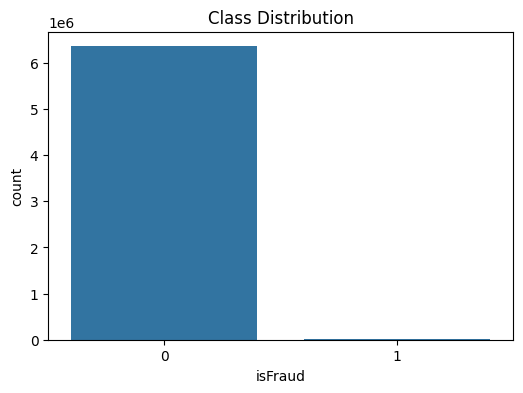

In [ ]:
# Visualizing Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=dt)
plt.title('Class Distribution')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Model training
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [ ]:
#Model evaluation
cm_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_per_class_lr = cm_lr.diagonal() / cm_lr.sum(axis=1)
class_names_lr = np.unique(y)
for class_name, accuracy in zip(class_names_lr, accuracy_per_class_lr):
    print(f"Logistic Regression - Class {class_name}: Accuracy = {accuracy:.2f}")

Logistic Regression - Class 0: Accuracy = 1.00
Logistic Regression - Class 1: Accuracy = 0.44


Logistic Regression - Recall: 0.44
Logistic Regression - F1 Score: 0.56
Logistic Regression - ROC AUC: 0.72


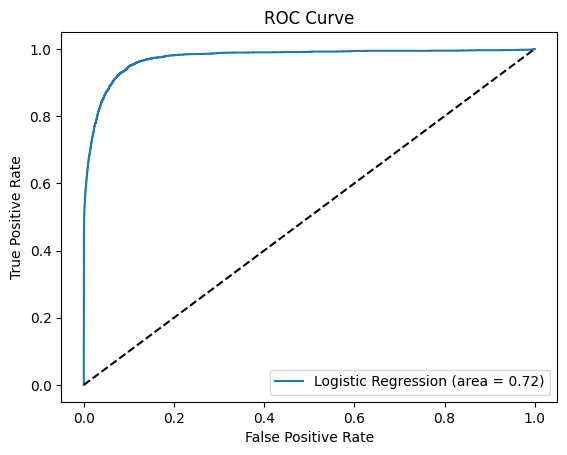

In [ ]:
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

print(f"Logistic Regression - Recall: {recall_lr:.2f}")
print(f"Logistic Regression - F1 Score: {f1_score_lr:.2f}")
print(f"Logistic Regression - ROC AUC: {roc_auc_lr:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Weighting Loss Function

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
dt = pd.read_csv("fraud.csv")

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for column in categorical_columns:
    dt[column] = label_encoder.fit_transform(dt[column].astype(str))

In [ ]:
X = dt.drop("isFraud", axis=1)
y = dt["isFraud"]

In [ ]:
# Removing NaN values
if y.isna().sum() > 0:
    dt = dt.dropna(subset=['isFraud'])
    X = dt.drop("isFraud", axis=1)
    y = dt["isFraud"]

In [ ]:
print("Dataset Shape:", dt.shape)
dt.info()
print(dt.describe())

Dataset Shape: (6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
               step          type        amount      nameOrig  oldbalanceOrg  \
count  6.362620e+06  6.362620e+06  6.362620e+06  6.362620e+06   6.362620e+06   
mean   2.433972e+02  1.714150e+00  1.798619e+05  3.176678e+06   8.338831e+05   
std    1.423320e+02  1.350117e+00  6.038582e+05  1.834064e+06   2.888243e+06   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    1.560000e+02  1.000000

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Class weights
class_weights = {0: 1, 1: len(y) / sum(y)}
print(class_weights)

{0: 1, 1: 774.7010836478753}


In [ ]:
# Model training
model_lr = LogisticRegression(class_weight=class_weights, random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [ ]:
#Model evaluation
#accuracy/recall
cm_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_per_class_lr = cm_lr.diagonal() / cm_lr.sum(axis=1)
class_names_lr = np.unique(y)
for class_name, accuracy in zip(class_names_lr, accuracy_per_class_lr):
    print(f"Logistic Regression - Class {class_name}: Accuracy = {accuracy:.2f}")

Logistic Regression - Class 0: Accuracy = 0.95
Logistic Regression - Class 1: Accuracy = 0.91


Logistic Regression - Recall: 0.91
Logistic Regression - F1 Score: 0.05
Logistic Regression - ROC AUC: 0.93


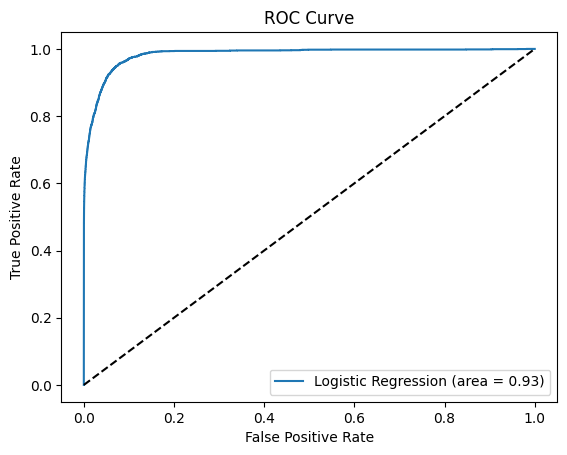

In [ ]:
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

print(f"Logistic Regression - Recall: {recall_lr:.2f}")
print(f"Logistic Regression - F1 Score: {f1_score_lr:.2f}")
print(f"Logistic Regression - ROC AUC: {roc_auc_lr:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Undersampling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
dt = pd.read_csv("fraud.csv")

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for column in categorical_columns:
    dt[column] = label_encoder.fit_transform(dt[column].astype(str))

In [ ]:
X = dt.drop("isFraud", axis=1)
y = dt["isFraud"]

In [ ]:
# Handling NaN values
if y.isna().sum() > 0:
    dt = dt.dropna(subset=['isFraud'])
    X = dt.drop("isFraud", axis=1)
    y = dt["isFraud"]

In [ ]:
print("Dataset Shape:", dt.shape)
dt.info()
print(dt.describe())

Dataset Shape: (5543649, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5543649 entries, 0 to 5543648
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(4)
memory usage: 507.5 MB
               step          type        amount      nameOrig  oldbalanceOrg  \
count  5.543649e+06  5.543649e+06  5.543649e+06  5.543649e+06   5.543649e+06   
mean   2.088778e+02  1.710358e+00  1.808671e+05  2.768293e+06   8.415698e+05   
std    1.118458e+02  1.348067e+00  6.271303e+05  1.598282e+06   2.920059e+06   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    1.380000e+02  1.000000

In [ ]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_orig, y_train_orig)

In [ ]:
pd.DataFrame(y_train_under).value_counts()

isFraud
0.0        2813
1.0        2813
dtype: int64

In [ ]:
# Feature selection based on correlation
# corr_matrix = X.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.45)]
# X.drop(to_drop, axis=1, inplace=True)

In [ ]:
# Model training
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_under, y_train_under)
y_pred_lr = model_lr.predict(X_test_orig)

In [ ]:
# Model evaluation
#accuracy/recall
cm_lr = confusion_matrix(y_test_orig, y_pred_lr)
accuracy_per_class_lr = cm_lr.diagonal() / cm_lr.sum(axis=1)
class_names_lr = np.unique(y_test_orig)
for class_name, accuracy in zip(class_names_lr, accuracy_per_class_lr):
    print(f"Logistic Regression - Class {class_name}: Accuracy = {accuracy:.2f}")

Logistic Regression - Class 0.0: Accuracy = 0.96
Logistic Regression - Class 1.0: Accuracy = 0.91


Logistic Regression - Recall: 0.91
Logistic Regression - F1 Score: 0.03
Logistic Regression - ROC AUC: 0.94


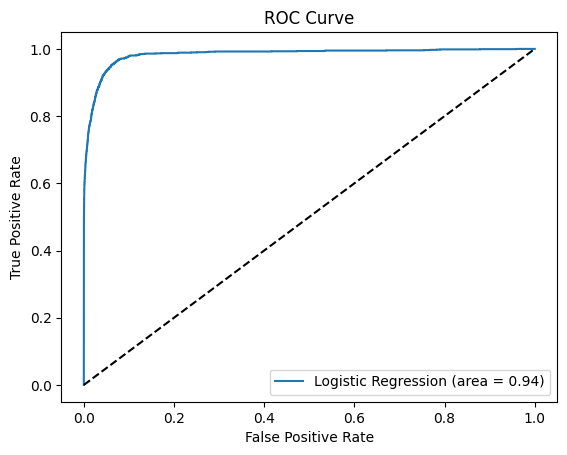

In [ ]:
recall_lr = recall_score(y_test_orig, y_pred_lr)
f1_score_lr = f1_score(y_test_orig, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test_orig, y_pred_lr)

print(f"Logistic Regression - Recall: {recall_lr:.2f}")
print(f"Logistic Regression - F1 Score: {f1_score_lr:.2f}")
print(f"Logistic Regression - ROC AUC: {roc_auc_lr:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_orig, model_lr.predict_proba(X_test_orig)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Logistic Regression - Class 0.0: Accuracy = 0.92
Logistic Regression - Class 1.0: Accuracy = 0.76
Logistic Regression - Recall: 0.76
Logistic Regression - F1 Score: 0.01
Logistic Regression - ROC AUC: 0.84


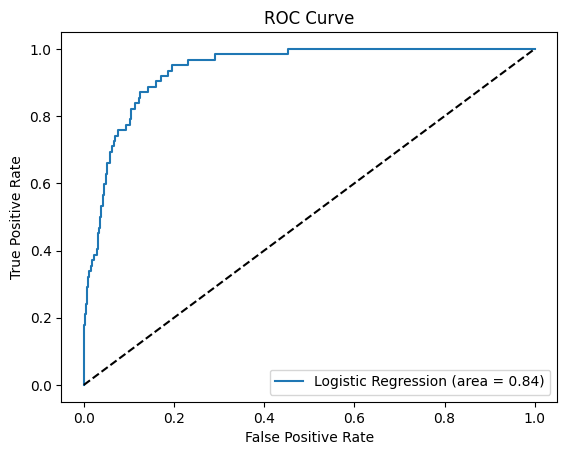

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

dt = pd.read_csv("fraud.csv")

# Encoding categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for column in categorical_columns:
    dt[column] = label_encoder.fit_transform(dt[column].astype(str))

X = dt.drop("isFraud", axis=1)
y = dt["isFraud"]

# Handling NaN values
if y.isna().sum() > 0:
    dt = dt.dropna(subset=['isFraud'])
    X = dt.drop("isFraud", axis=1)

    y = dt["isFraud"]

# Splitting into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.33, random_state=42)

# Random undersampling on training data
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_orig, y_train_orig)

# Train model on undersampled data
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_under, y_train_under)

# Evaluate on original test data
y_pred_lr = model_lr.predict(X_test_orig)

# Model evaluation
cm_lr = confusion_matrix(y_test_orig, y_pred_lr)
accuracy_per_class_lr = cm_lr.diagonal() / cm_lr.sum(axis=1)
class_names_lr = np.unique(y_test_orig)
for class_name, accuracy in zip(class_names_lr, accuracy_per_class_lr):
    print(f"Logistic Regression - Class {class_name}: Accuracy = {accuracy:.2f}")

recall_lr = recall_score(y_test_orig, y_pred_lr)
f1_score_lr = f1_score(y_test_orig, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test_orig, y_pred_lr)

print(f"Logistic Regression - Recall: {recall_lr:.2f}")
print(f"Logistic Regression - F1 Score: {f1_score_lr:.2f}")
print(f"Logistic Regression - ROC AUC: {roc_auc_lr:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_orig, model_lr.predict_proba(X_test_orig)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Oversampling

## ADASYN fraud dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dt = pd.read_csv("fraud.csv")

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for column in categorical_columns:
    dt[column] = label_encoder.fit_transform(dt[column].astype(str))

In [ ]:
X = dt.drop("isFraud", axis=1)
y = dt["isFraud"]

In [ ]:
# Handling NaN values
if y.isna().sum() > 0:
    dt = dt.dropna(subset=['isFraud'])
    X = dt.drop("isFraud", axis=1)
    y = dt["isFraud"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
adasyn = ADASYN(sampling_strategy='minority', random_state=8, n_neighbors=5)
X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [ ]:
# Feature selection based on correlation
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.45)]
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

In [ ]:
# Model training
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

In [ ]:
# Model training using SVC
# model_svc = SVC(class_weight='balanced', degree=3, random_state=42)
# model_svc.fit(X_train, y_train)
# y_pred_svc = model_svc.predict(X_test)

Logistic Regression - Class 0: Accuracy = 0.66
Logistic Regression - Class 1: Accuracy = 0.71
Logistic Regression - Recall: 0.71
Logistic Regression - F1 Score: 0.01
Logistic Regression - ROC AUC: 0.68


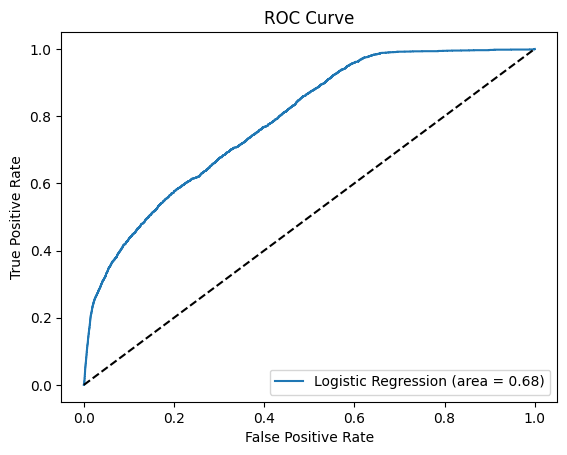

In [ ]:
# Model evaluation
cm_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_per_class_lr = cm_lr.diagonal() / cm_lr.sum(axis=1)
class_names_lr = np.unique(y_test)

for class_name, accuracy in zip(class_names_lr, accuracy_per_class_lr):
    print(f"Logistic Regression - Class {class_name}: Accuracy = {accuracy:.2f}")

recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

print(f"Logistic Regression - Recall: {recall_lr:.2f}")
print(f"Logistic Regression - F1 Score: {f1_score_lr:.2f}")
print(f"Logistic Regression - ROC AUC: {roc_auc_lr:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# SMOTE fraud dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dt = pd.read_csv("fraud.csv")

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for column in categorical_columns:
    dt[column] = label_encoder.fit_transform(dt[column].astype(str))

In [ ]:
X = dt.drop("isFraud", axis=1)
y = dt["isFraud"]

In [ ]:
# Handling NaN values
if y.isna().sum() > 0:
    dt = dt.dropna(subset=['isFraud'])
    X = dt.drop("isFraud", axis=1)
    y = dt["isFraud"]

In [ ]:
print("Class Distribution:")
print(dt['isFraud'].value_counts())

Class Distribution:
0    6354407
1       8213
Name: isFraud, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state=8)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Feature selection based on correlation
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.45)]
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

In [ ]:
# Model training
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

Logistic Regression - Class 0: Accuracy = 0.79
Logistic Regression - Class 1: Accuracy = 0.68
Logistic Regression - Recall: 0.68
Logistic Regression - F1 Score: 0.01
Logistic Regression - ROC AUC: 0.73


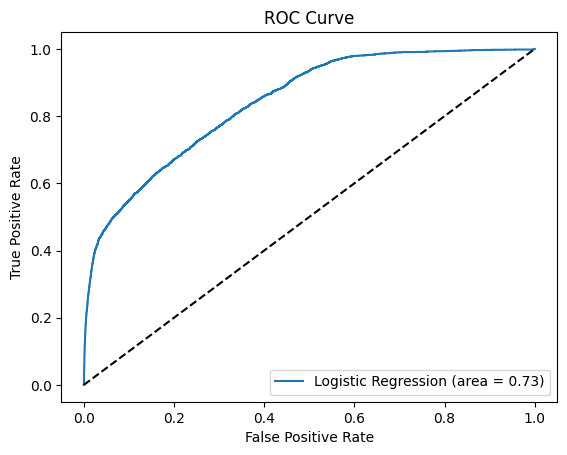

In [ ]:
# Model Evaluation
cm_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_per_class_lr = cm_lr.diagonal() / cm_lr.sum(axis=1)
class_names_lr = np.unique(y_test)

for class_name, accuracy in zip(class_names_lr, accuracy_per_class_lr):
    print(f"Logistic Regression - Class {class_name}: Accuracy = {accuracy:.2f}")

recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

print(f"Logistic Regression - Recall: {recall_lr:.2f}")
print(f"Logistic Regression - F1 Score: {f1_score_lr:.2f}")
print(f"Logistic Regression - ROC AUC: {roc_auc_lr:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# SMOTE/ADASYN CreditCard dataset

## ADASYN
Refer to fraud dataset example

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
dt = pd.read_csv("creditcard.csv")

In [ ]:
X = dt.drop("Class", axis=1)
y = dt["Class"]

In [ ]:
if y.isna().sum() > 0:
    dt = dt.dropna(subset=['Class'])
    X = dt.drop("Class", axis=1)
    y = dt["Class"]

In [ ]:
# Oversampling using ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=8, n_neighbors=5)
X, y = adasyn.fit_resample(X, y)

In [ ]:
pd.DataFrame(y).value_counts()

Class
0        284315
1        284298
dtype: int64

In [ ]:
# Feature selection based on correlation
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.45)]
X.drop(to_drop, axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Model training
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [ ]:
# Model training using SVC
# model_svc = SVC(class_weight='balanced', degree=3, random_state=42)
# model_svc.fit(X_train, y_train)
# y_pred_svc = model_svc.predict(X_test)

In [ ]:
# Model Evaluation  !Testing on resamled data. For corect testing refer ADASYN fraud dataset region
cm_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_per_class_lr = cm_lr.diagonal() / cm_lr.sum(axis=1)
class_names_lr = np.unique(y)

for class_name, accuracy in zip(class_names_lr, accuracy_per_class_lr):
    print(f"Logistic Regression - Class {class_name}: Accuracy = {accuracy:.2f}")

Logistic Regression - Class 0: Accuracy = 0.73
Logistic Regression - Class 1: Accuracy = 0.68


In [ ]:
# cm_svc = confusion_matrix(y_test, y_pred_svc)
# accuracy_per_class_svc = cm_svc.diagonal() / cm_svc.sum(axis=1)
# class_names_svc = np.unique(y)

# for class_name, accuracy in zip(class_names_svc, accuracy_per_class_svc):
#     print(f"SVC - Class {class_name}: Accuracy = {accuracy:.2f}")


Logistic Regression - Recall: 0.68
Logistic Regression - F1 Score: 0.70
Logistic Regression - ROC AUC: 0.70


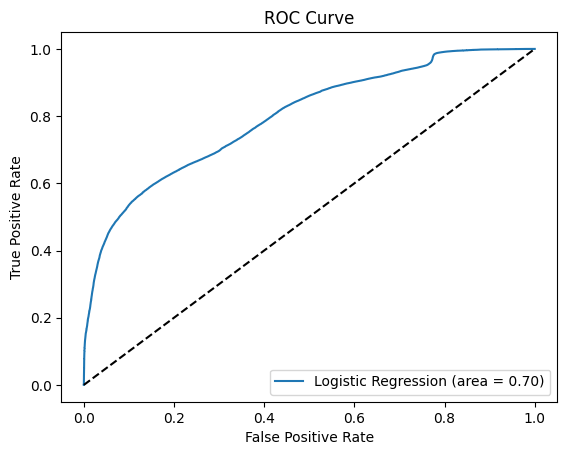

In [ ]:
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

print(f"Logistic Regression - Recall: {recall_lr:.2f}")
print(f"Logistic Regression - F1 Score: {f1_score_lr:.2f}")
print(f"Logistic Regression - ROC AUC: {roc_auc_lr:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## SMOTE
refer to fraud dataset example

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
dt = pd.read_csv("creditcard.csv")

In [ ]:
print("Class Distribution:")
print(dt['Class'].value_counts())

Class Distribution:
0    284315
1       492
Name: Class, dtype: int64


In [ ]:
X = dt.drop("Class", axis=1)
y = dt["Class"]

In [ ]:
# Handling NaN values
if y.isna().sum() > 0:
    dt = dt.dropna(subset=['Class'])
    X = dt.drop("Class", axis=1)
    y = dt["Class"]

In [ ]:
# Oversampling using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=8)
X, y = smote.fit_resample(X, y)

In [ ]:
pd.DataFrame(y).value_counts()

Class
0        284315
1        284315
dtype: int64

In [ ]:
# Feature selection based on correlation
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.45)]
X.drop(to_drop, axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Model training
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [ ]:
# Evaluate the model  !Testing on resamled data. For corect testing refer ADASYN fraud dataset region
#accuracy/recall
cm_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_per_class_lr = cm_lr.diagonal() / cm_lr.sum(axis=1)
class_names_lr = np.unique(y)

for class_name, accuracy in zip(class_names_lr, accuracy_per_class_lr):
    print(f"Logistic Regression - Class {class_name}: Accuracy = {accuracy:.2f}")

Logistic Regression - Class 0: Accuracy = 0.76
Logistic Regression - Class 1: Accuracy = 0.68


Logistic Regression - Recall: 0.68
Logistic Regression - F1 Score: 0.71
Logistic Regression - ROC AUC: 0.72


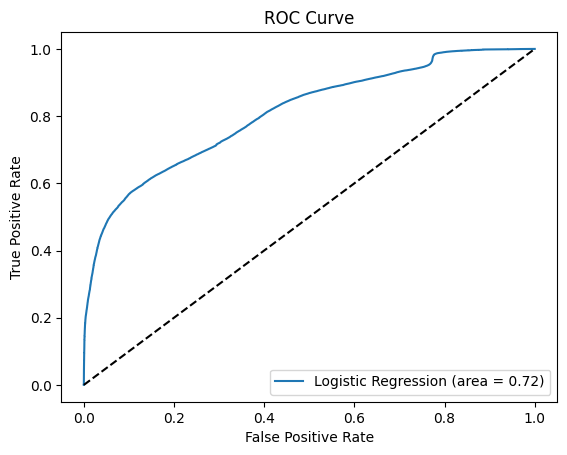

In [ ]:
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

print(f"Logistic Regression - Recall: {recall_lr:.2f}")
print(f"Logistic Regression - F1 Score: {f1_score_lr:.2f}")
print(f"Logistic Regression - ROC AUC: {roc_auc_lr:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()